In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import exp, loadtxt, pi, sqrt
import pandas as pd
from scipy.optimize import curve_fit
from scipy import optimize
from scipy import stats
from lmfit import Model
import os

In [2]:
files = !ls data/U*.txt

hora = np.array(list(open("list.txt","r")))

for i in range(len(hora)):
    hora[i] = hora[i][:-1]

print(hora)
print(files)

['Datos' 'Datos' 'Datos' 'Datos' 'Datos' 'Datos' 'Datos' 'Datos' '']
['data/U1.txt', 'data/U2.txt', 'data/U3.txt', 'data/U4.txt', 'data/U5.txt', 'data/U6.txt', 'data/U7.txt', 'data/U8.txt']


[ 2.71001900e-02  5.63642290e-01  1.05532234e+01 -7.45290879e+00
 -3.61251530e-03]


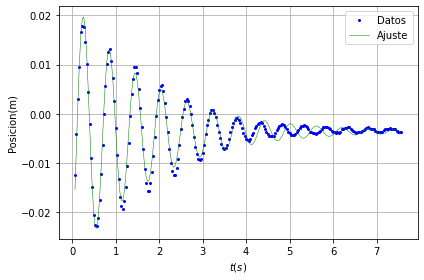

[ 0.02542187  0.54238129 10.58249813 -1.21534777]


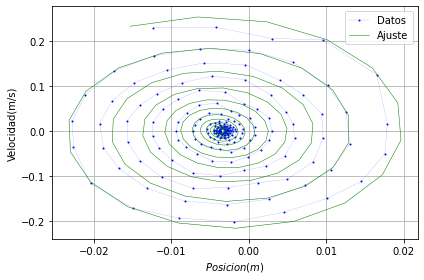

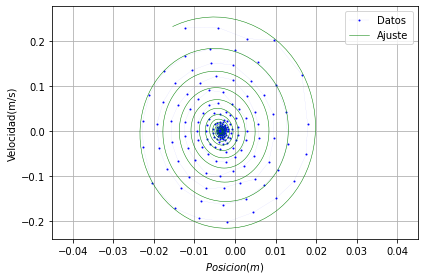

[ 5.22424239e-02  4.13983911e-01  1.04672334e+01 -3.29994102e+00
 -3.88076534e-03]


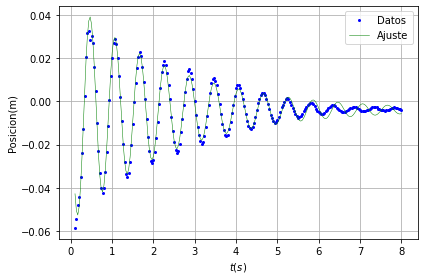

[ 0.04676029  0.38162428 10.41932968 -3.18203383]


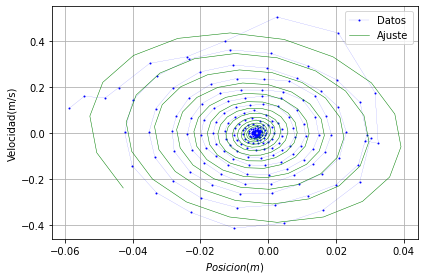

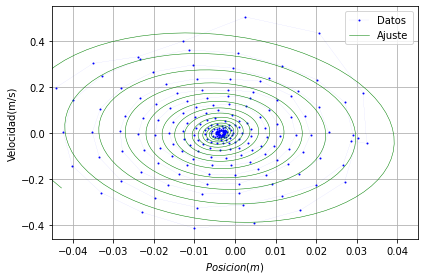

[ 5.64505433e-02  3.86718345e-01  9.60927046e+00 -1.62320938e+00
 -2.69462262e-03]


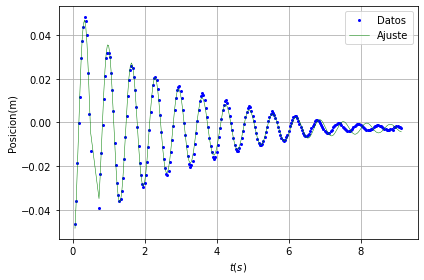

[ 0.05905883  0.40396188  9.61698414 -1.64480463]


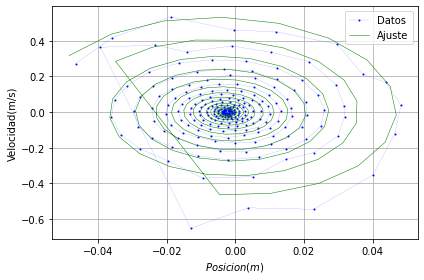

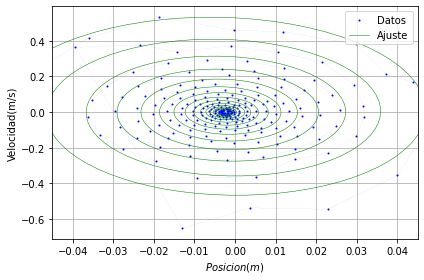

[ 5.20914470e-02  3.82700894e-01  9.62157549e+00 -1.91330391e+00
 -3.31260078e-03]


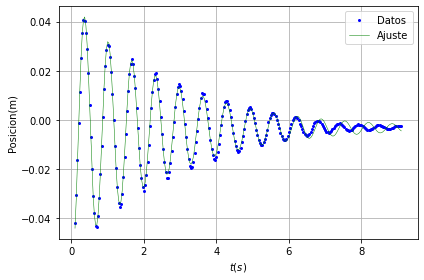

[ 0.05074857  0.37976784  9.63011983 -1.93420348]


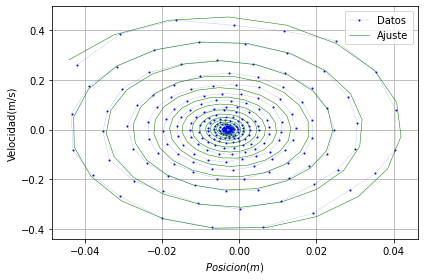

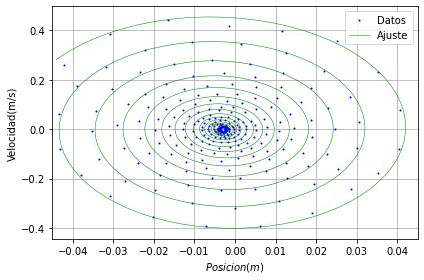

[ 3.54479766e-02  3.62607931e-01  8.91463240e+00 -1.24226617e+00
 -3.35971670e-03]


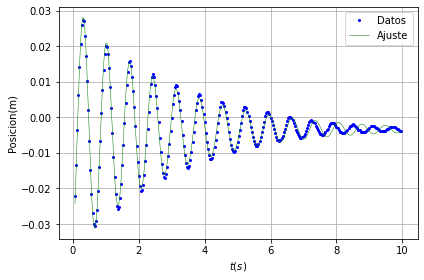

[ 0.03450744  0.3584034   8.92091409 -1.25866935]


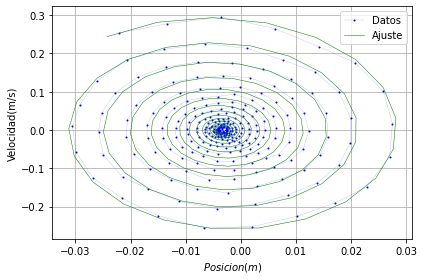

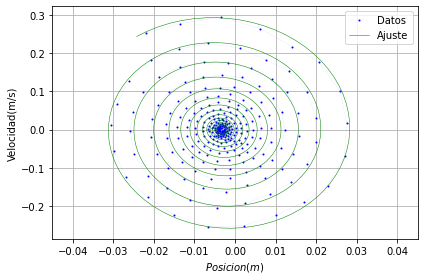

[ 4.01576370e-02  3.64661752e-01  8.93364330e+00 -6.45185262e+00
 -4.44995624e-03]


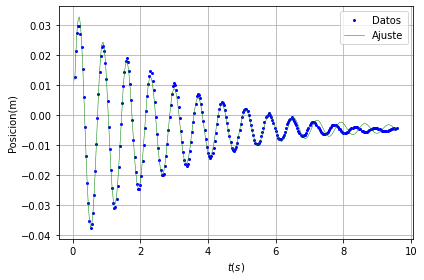

[ 0.0390822   0.36063069  8.93246012 -0.16554179]


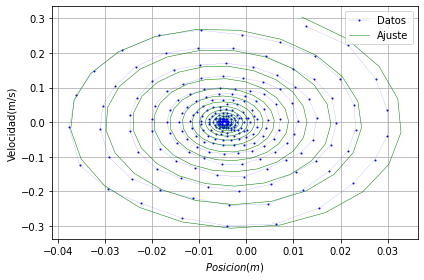

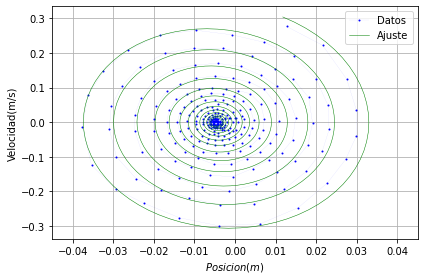

[ 2.42068595e-02  4.18005765e-01  8.45920763e+00 -8.11810696e+00
 -4.00724452e-03]


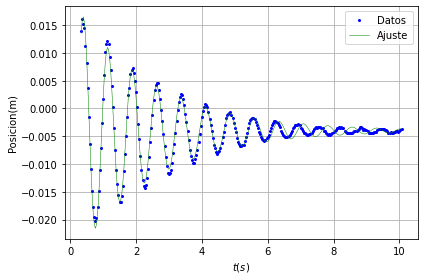

[ 0.02371505  0.41554068  8.45491571 -1.8248644 ]


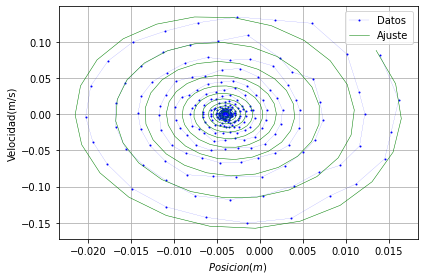

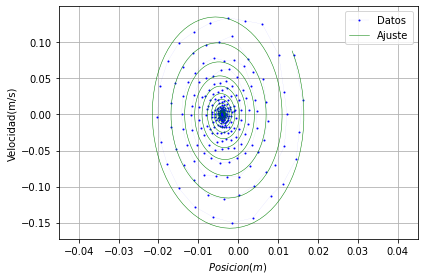

[-3.88368303e-02  3.68925486e-01  8.41405340e+00 -5.51951076e+00
 -2.57727844e-03]


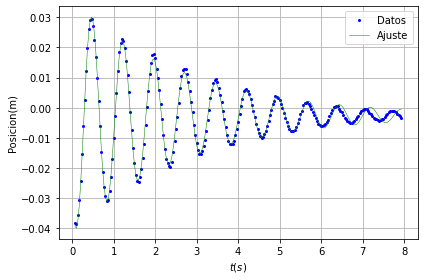

[ 0.03836473  0.36895667  8.41844471 -2.38585938]


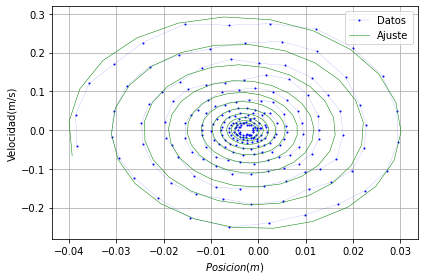

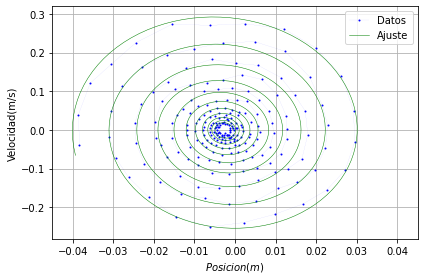

In [3]:
for fil,hor in zip(files,hora):
    #Se lee el archivo de origen
    data = pd.read_csv(fil, sep=" ", header=None)
    data.columns = ["a", "b", "c", "d"]
    # Se convierten los archivos del data a valores
    ds = data.values
    #print(ds)
    
    
    # Se leen los datos, para ello se crean unos arreglos con append que contienen los datos ahora
    
    OriginalX = []
    OriginalY = []
    OriginalZ = []

    for i in range(len(ds)):
        OriginalX.append(ds[i][0])
        OriginalY.append(ds[i][1])
        OriginalZ.append(ds[i][2])
    #print(OriginalX)
    #print(OriginalY)
    
    ### Ahora se va a realizar el ajuste correspondiente, para ello se va a crear una función
    ### con parámetros que contengan los valores del ajuste
    
    ## Definimos la variables xfit, yfit para la posterior grafica
    xfit = OriginalX 
    yfit = OriginalY
    zfit = OriginalZ
    #print(xfit)
    #print(yfit)
    # Definimos la funcion 
    def funcionseno(x, a, b, c, d, e):
        return a* exp(-b*x) * np.sin(c * x + d) + e

    #print(xfit)
    #print(yfit)

    popt, pcov = optimize.curve_fit(funcionseno, xfit, yfit, p0=[1,1,1,1,1], maxfev=5000)
    print(popt)
    #print(pcov)
    
    #Con los diferentes parámetros obtenidos se puede realizar el respectivo ajuste, para ello creamos 
    #los nuevos valores de y a partir de la expresión que sugerimos para el ajuste
    
    A = np.zeros(len(xfit)) + popt[0]
    B = np.zeros(len(xfit)) + popt[1]
    C = np.zeros(len(xfit)) + popt[2]
    D = np.zeros(len(xfit)) + popt[3]
    E = np.zeros(len(xfit)) + popt[4]
    #print(A)
    
    # Se define de nuevo los nuevos valores de Y , yajuste, donde xfit son los valores originales de los datos
    yajuste = A * exp(-B*xfit) * np.sin(C * xfit + D) + E
    #print(yajuste)




    #se grafican los datos de posicion y vs tiempo x
    data.plot(x='a',y='b',color='blue',marker='o',linewidth=0,markersize=2.0,label=hor)
    # se grafica el ajuste
    plt.plot(xfit, yajuste,color='green',linewidth=0.5, label='Ajuste')
    plt.xlabel(r'$t (s)$')
    plt.ylabel(r'Posicion(m)')
    plt.legend(loc='upper right')
    #plt.title("Video "+str(fil)[1:-4])
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("figures/"+str(fil)[5:-4]+".pdf",dpi=600)
    plt.show()



    
    ### Ahora se va a trazar la línea teórica para el espacio de fases teniendo en cuenta 
    #los parámetros obtenidos anteriormente, recordando la ecuación de velocidad para el amortiguado
    # en términos del párametro del tiempo
    
    ## Definimos la variables xfit, yfit para la posterior grafica
    xfit = OriginalX
    yfit = OriginalY
    zfit = OriginalZ
    #print(xfit)
    #print(yfit)
    # Definimos la funcion 
    def vel(x, k, l, m, n):
        return k* exp(-l*x) *(m*np.cos(m * x + n)-l * np.sin(m * x + n))

    #print(xfit)
    #print(yfit)

    poptd, pcovd = optimize.curve_fit(vel, xfit, zfit, p0=[1,1,1,1], maxfev=5000)
    print(poptd)
    #print(pcovd)
    
    #Con los diferentes parámetros obtenidos se puede realizar el respectivo ajuste, para ello creamos 
    #los nuevos valores de y a partir de la expresión que sugerimos para el ajuste
    
    K = np.zeros(len(xfit)) + poptd[0]
    L = np.zeros(len(xfit)) + poptd[1]
    M = np.zeros(len(xfit)) + poptd[2]
    N = np.zeros(len(xfit)) + poptd[3]
    #print(A)

    
    # Definimos la funcion de la velocidad
    Vel = K* exp(-L*xfit) *(M*np.cos(M * xfit + N)- L * np.sin(M * xfit + N))
    #print(Vel)

    #Al graficar tendremos la misma cantidad de puntos para la nueva gráfica, para ello se generan un nuevo 
    ##arreglo de número empezando por el primer valor y el último valor teniendo en cuenta el ajuste
    
    
    #se grafican los datos de posicion y vs velocidad v experimental
    data.plot(x='b',y='c',color='blue', label=hor,marker='.',markersize=2.0,linewidth=0.1)
    #se grafican los datos de posicion y Yajuste vs velocidad V del ajuste con Vel, dado que 
    # ajustamos los datos tanto de posición como de velocidad
    plt.plot(yajuste, Vel, color='green',linewidth=0.5, label='Ajuste')
    plt.xlabel(r'$Posicion(m)$')
    plt.ylabel(r'Velocidad(m/s)')
    plt.legend(loc='upper right')
    #plt.title("Video "+str(fil)[1:-4])
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("figures/"+str(fil)[5:-4]+"_Phase"+".pdf",dpi=600)
    plt.show()
    
    # Definimos el tiempo entre el primer valor y el ultimo valor del tiempo Original y damos 
    # pasos de 1000, se llenan 1000 datos
    time = np.linspace(OriginalX[0], OriginalX[i],1000)
    #print(time)
    
    Ad = np.zeros(len(time)) + popt[0]
    Bd = np.zeros(len(time)) + popt[1]
    Cd = np.zeros(len(time)) + popt[2]
    Dd = np.zeros(len(time)) + popt[3]
    Ed = np.zeros(len(time)) + popt[4]

    
    # Posición con más datos
    Position = Ad * exp(-Bd * time) * np.sin(Cd * time + Dd) + Ed
    #print(Position)
    
    Kd = np.zeros(len(time)) + poptd[0]
    Ld = np.zeros(len(time)) + poptd[1]
    Md = np.zeros(len(time)) + poptd[2]
    Nd = np.zeros(len(time)) + poptd[3]
    #print(A)
    
    # Velocidad con más datos
    Velocity = Kd* exp(-Ld*time) *(Md*np.cos(Md * time + Nd)- Ld * np.sin(Md * time + Nd))
    #print(Velocity)

    
    #se grafican los datos de posicion y vs velocidad v experimental
    data.plot(x='b',y='c',color='blue', label=hor,marker='.',markersize=2.0,linewidth=0.05,ls='--')
    #se grafican los datos de posicion y Yajuste vs velocidad V del ajuste con Vel, dado que 
    # ajustamos los datos tanto de posición como de velocidad
    plt.plot(Position, Velocity, color='green',linewidth=0.5, label='Ajuste')
    plt.xlabel(r'$Posicion(m)$')
    plt.ylabel(r'Velocidad(m/s)')
    plt.xlim(-0.045,0.045)
    plt.legend(loc='upper right')
    #plt.title("Video "+str(fil)[1:-4])
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("figures/"+str(fil)[5:-4]+"_PhaseHD"+".pdf",dpi=600)
    plt.show()

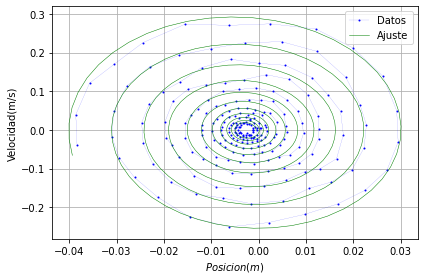

In [4]:
    time = np.linspace(OriginalX[0], OriginalX[i],500)
    #print(time)
    
    Ad = np.zeros(len(time)) + popt[0]
    Bd = np.zeros(len(time)) + popt[1]
    Cd = np.zeros(len(time)) + popt[2]
    Dd = np.zeros(len(time)) + popt[3]
    Ed = np.zeros(len(time)) + popt[4]

    
    # Posición con más datos
    Position = Ad * exp(-Bd * time) * np.sin(Cd * time + Dd) + Ed
    #print(Position)
    
    Kd = np.zeros(len(time)) + poptd[0]
    Ld = np.zeros(len(time)) + poptd[1]
    Md = np.zeros(len(time)) + poptd[2]
    Nd = np.zeros(len(time)) + poptd[3]
    #print(A)
    
    # Velocidad con más datos
    Velocity = Kd* exp(-Ld*time) *(Md*np.cos(Md * time + Nd)- Ld * np.sin(Md * time + Nd))
    #print(Velocity)

    
    #se grafican los datos de posicion y vs velocidad v experimental
    data.plot(x='b',y='c',color='blue', label=hor,marker='.',markersize=2.0,linewidth=0.1)
    #se grafican los datos de posicion y Yajuste vs velocidad V del ajuste con Vel, dado que 
    # ajustamos los datos tanto de posición como de velocidad
    plt.plot(Position, Velocity, color='green',linewidth=0.5, label='Ajuste')
    plt.xlabel(r'$Posicion(m)$')
    plt.ylabel(r'Velocidad(m/s)')
    plt.legend(loc='upper right')
    #plt.title("Video "+str(fil)[1:-4])
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("figures/"+str(fil)[5:-4]+"_PhaseHD"+".pdf",dpi=600)
    plt.show()

[3.05931973 1.45754553]


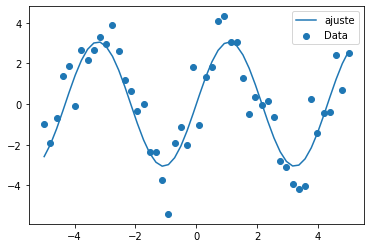

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# generar datos
np.random.seed(0)
x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

# definir funcion
def funcionseno(x, a, b):
    return a * np.sin(b * x)

params, params_covariance = optimize.curve_fit(funcionseno, x_data, y_data, p0=[2, 2])
print(params)

# graficar
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, funcionseno(x_data, params[0], params[1]), label='ajuste')

plt.legend(loc='best')

plt.show()